## Visibility Polygon in Geopandas

This notebook illustrates how to create a visibility polygon from a given point on geopandas framework.

The codes are adapted from 

https://discourse.panda3d.org/t/visibility-polygons/13993/3

which is a Python porting of [byronknoll's JavaScript codes](https://github.com/byronknoll/visibility-polygon-js). 

In [1]:
import sys
from shapely.geometry import Polygon
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

sys.path.append("../vispol") 
from vispolsh import *

### create a geodataframe

In [2]:
polygons = []
    
polygons.append(Polygon([[-1,-1],[501,-1],[501,501],[-1,501]]))
polygons.append(Polygon([[240,240],[260,240],[260,260],[240,260]]))
polygons.append(Polygon([[240,260],[260,260],[260,280],[240,280]]))
polygons.append(Polygon([[260,240],[280,240],[280,260],[260,260]]))
polygons.append(Polygon([[440,240],[460,240],[460,260],[440,260]]))
polygons.append(Polygon([[250,100],[260,140],[240,140]]))
polygons.append(Polygon([[280,100],[290,60],[270,60]]))
polygons.append(Polygon([[310,100],[320,140],[300,140]]))
polygons.append(Polygon([[50,450],[60,370],[70,450]]))
polygons.append(Polygon([[450,450],[460,370],[470,450]]))
polygons.append(Polygon([[50,50],[60,30],[70,50]]))
polygons.append(Polygon([[450,50],[460,30],[470,50]]))
polygons.append(Polygon([[140,340],[160,240],[180,340],[360,340],[360,360],[250,390],[140,360]]))
polygons.append(Polygon([[140,140],[150,130],[150,145],[165,150],[160,160],[140,160]]))

fp = gpd.GeoDataFrame({'geometry':polygons})

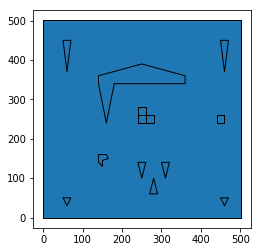

In [4]:
f, ax = plt.subplots(1)
fp.plot(axes=ax, facecolor=None, edgecolor='black')

## compute visiblity polygon

In [8]:
VP = VisibilityPolygon()
segments = VP.shapely2segments(polygons)
# position
position = [209, 109]
visibility = VP.compute(position, segments)

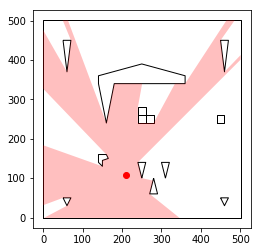

In [6]:
f, ax = plt.subplots(1)
fp.plot(axes=ax, facecolor="white", edgecolor='black')
gpd.plotting.plot_polygon_collection(ax, [Polygon(visibility)], facecolor='red', alpha=0.25, linewidth=0.1)
gpd.plotting.plot_point_collection(ax, [Point(position)], facecolor='red')